In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

features = iris.data
target = iris.target

df = pd.DataFrame(features)
df.columns = iris.feature_names



In [3]:
df.shape


(150, 4)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


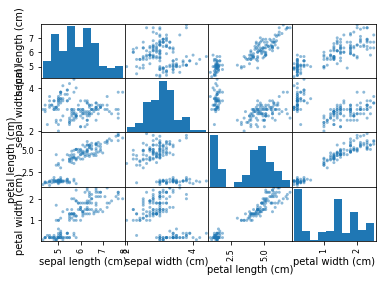

In [7]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
scatter_matrix(df)
plt.show()

In [16]:
from sklearn.cluster import KMeans

X =[]
y = []
for i in range(1,31):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    X.append(i)
    y.append(kmeans.inertia_/df.shape[0])
    

    

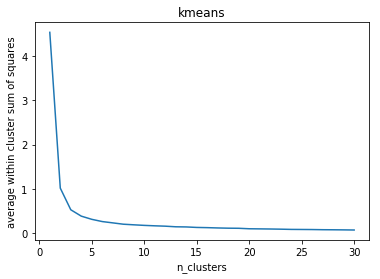

In [17]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.xlabel('n_clusters')
plt.ylabel('average within cluster sum of squares')
plt.title('kmeans')
plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [19]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df)
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]]


In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

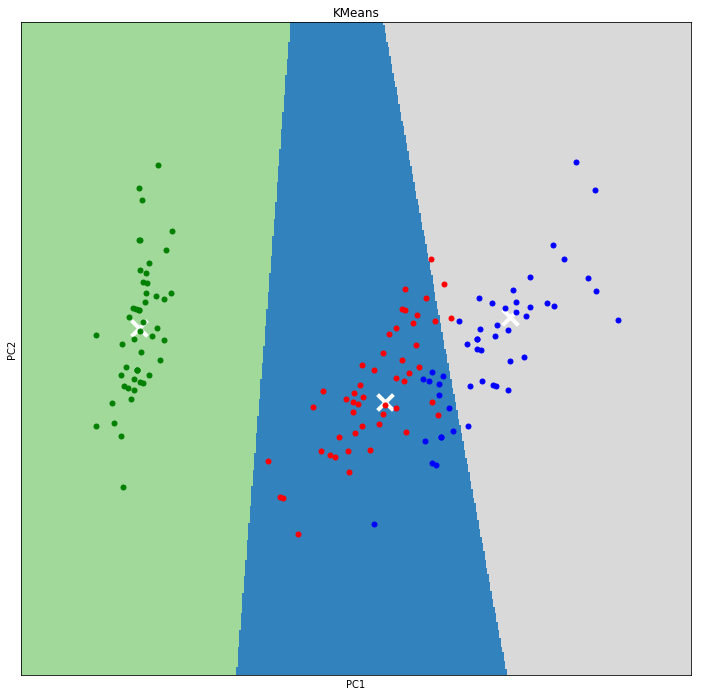

In [38]:
h = 0.02
x_min,x_max = pc[:,0].min()-1,pc[:,0].max()+1
y_min,y_max= pc[:,1].min()-1,pc[:,1].max()+1

xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,12))
plt.clf()
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = plt.cm.tab20c,
          aspect = 'auto',origin = 'lower')

for i,point in enumerate(pc):
    if target[i]==0:
        plt.plot(point[0],point[1],'g.',markersize = 10)
    if target[i]==1:
        plt.plot(point[0],point[1],'r.',markersize = 10)
    if target[i]==2:
        plt.plot(point[0],point[1],'b.',markersize = 10)
    
        
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=250,linewidth=4,color='w')
plt.title('KMeans')
plt.xticks(())
plt.yticks(())
plt.xlabel('PC1')
plt.ylabel('PC2')
        
    
plt.show()

In [43]:
from sklearn import metrics

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(features)

kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)

print('Non Reduced data')
print('Homogenity:{}'.format(metrics.homogeneity_score(target,kmeans1.labels_)))
print('Completeness:{}'.format(metrics.completeness_score(target,kmeans1.labels_)))
print('V-Measure:{}'.format(metrics.v_measure_score(target,kmeans1.labels_)))

print('Reduced data')
print('Homogenity:{}'.format(metrics.homogeneity_score(target,kmeans2.labels_)))
print('Completeness:{}'.format(metrics.completeness_score(target,kmeans2.labels_)))
print('V-Measure:{}'.format(metrics.v_measure_score(target,kmeans2.labels_)))



kmeans2

Non Reduced data
Homogenity:0.7514854021988339
Completeness:0.7649861514489816
V-Measure:0.7581756800057786
Reduced data
Homogenity:0.7364192881252849
Completeness:0.7474865805095324
V-Measure:0.7419116631817836


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
print(kmeans1.labels_)
print(kmeans2.labels_)
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
